In [272]:
import uncertainties as unc  
import uncertainties.unumpy as unumpy  
from uncertainties import ufloat
import matplotlib.pyplot as plt
import numpy as np

from scipy.optimize import curve_fit 

In [822]:
# 2.05, 0.92

# Initialize Data
with open('data1.txt') as f:
    lines = f.readlines()
    t = np.array([float(line.split()[0])*4 for line in lines])
    x = np.array([line.split()[2] for line in lines])
    y = np.array([2.05-0.92*float(line.split()[1]) for line in lines])

# Errors
err_t = np.array([])

err_t = np.array([0.004 for i in t])
err_x = np.array([0.014/3 for i in x])
err_y = np.array([0.01/3  for i in y])

# Convert to unumpy array for easy error propagation
t = unumpy.uarray(t, err_t)
x = unumpy.uarray(x, err_x)
y = unumpy.uarray(y, err_y)

print("#of Data Points:",len(t))

#of Data Points: 12170


# Get max points

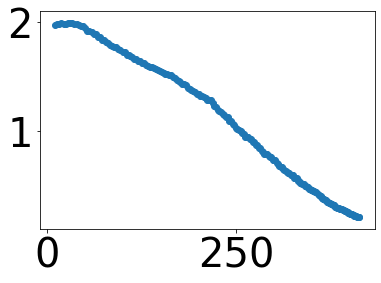

In [823]:
max_points = []
max_points_t = []
max_points_x = []

err_max_points = []
err_max_points_t = []
err_max_points_x = []

for i in np.arange(1,len(x)-1):
    # Conditions to be met
    local_max_from_left = x[i] > x[i-1]
    local_max_from_right = x[i] > x[i+1]
    positive = x[i] > 0
    local_max = local_max_from_left and local_max_from_right and positive

    # If conditions are met
    if local_max:
        
        max_points.append(y[i].n)
        max_points_t.append(t[i].nominal_value)
        max_points_x.append(x[i].nominal_value)

        err_max_points.append(y[i].std_dev)
        err_max_points_t.append(t[i].std_dev)
        err_max_points_x.append(x[i].std_dev)

max_points_t = np.asarray(max_points_t, dtype=np.float32)
max_points = np.asarray(max_points, dtype=np.float32)
err_max_points_t = np.asarray(err_max_points_t, dtype=np.float32)
err_max_points = np.asarray(err_max_points, dtype=np.float32)

# Convert to unumpy array for easy error propagation
max_points_t = unumpy.uarray(max_points_t, err_max_points_t)
max_points = unumpy.uarray(max_points, err_max_points)

plt.scatter(np.array([i.n for i in max_points_t]),np.array([i.n for i in max_points]))

# Get the periods

In [824]:
period = np.array([])
period_height = np.array([])

for i in np.arange(1,len(max_points)):
    period = np.append(period, max_points_t[i]-max_points_t[i-1])
    period_height = np.append(period_height, max_points[i])

In [881]:
n = 40

period_groups = np.array_split(period, n)[:20]
period_height_groups = np.array_split(period_height, n)[:20]

period_specific = np.array([sum(i)/len(i) for i in period_groups])[:20]
period_height_specific = np.array([sum(i)/len(i) for i in period_height_groups])[:20]

In [882]:
period_height_specific_raw = np.array([i.n for i in period_height_specific])
period_specific_raw = np.array([i.n for i in period_specific])
period_height_specific_raw_err = np.array([i.std_dev for i in period_height_specific])
period_specific_raw_err = np.array([i.std_dev for i in period_specific])

In [883]:
def f(y, d):
    return 2*np.pi*np.sqrt((y+d)/9.8)

def f2(y, I):
    d = 0.08
    return 2*np.pi*np.sqrt(
        (I+(y+d)**2) /
        (9.81*(y+d))
        )

# def f3(y, I, d):
#     y = y + d
#     return np.sqrt(
#         4.03*
#         y*(1+I/y)
#         )

def f4(y, d):
    I = 0.00177633333
    return 4*np.pi**2/9.8*(y+d)*(1+I/((y+d)**2))


## Simple Period Fit

[0.05676288935161158+/-0.0026619309901954207]


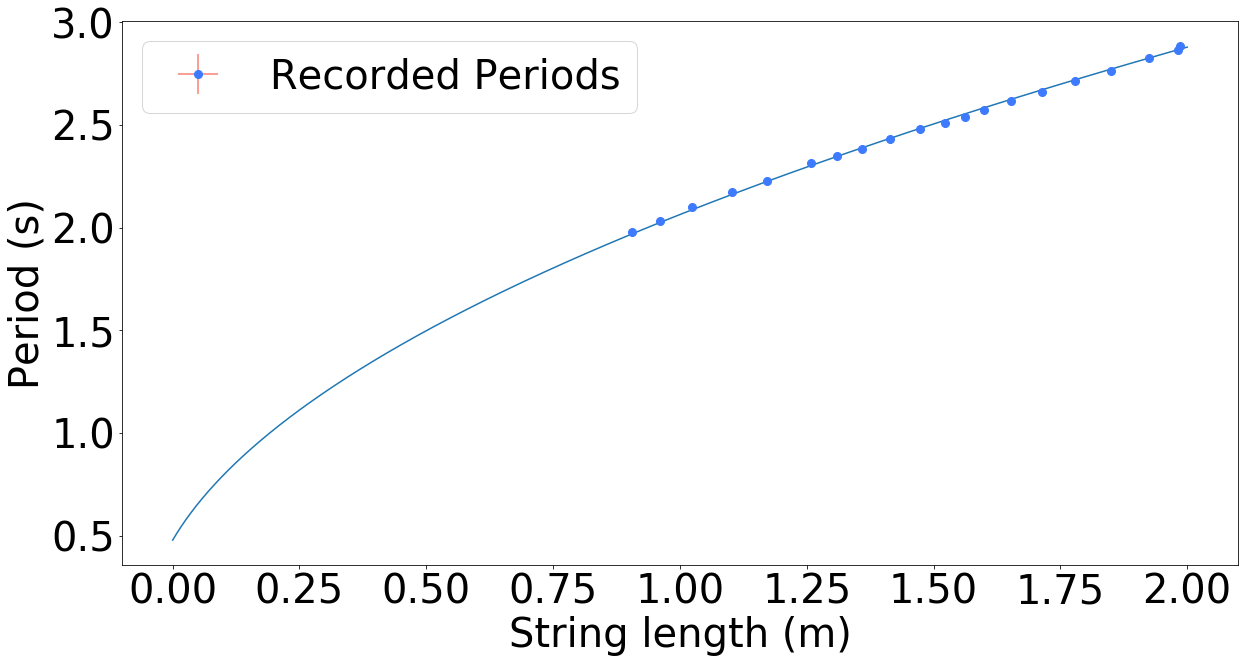

In [884]:
param, cov = curve_fit(f, period_height_specific_raw, period_specific_raw, p0=[0.08])
plt.figure(figsize=(20,10))

plt.errorbar(period_height_specific_raw,period_specific_raw,yerr=period_specific_raw_err,xerr=period_height_specific_raw_err,
                 fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=8, label="Recorded Periods")
plt.plot(np.linspace(0,2,1000),f(np.linspace(0,2,1000), param[0]))

p = unumpy.uarray(param, np.sqrt(np.diag(cov)))
print(p)


plt.rcParams.update({'font.size': 40})
plt.xlabel("String length (m)")
plt.ylabel("Period (s)")
plt.legend(loc="upper left")
# plt.savefig("Figures/normal_2.png", dpi=300)

## Complex Period Fit

[-0.027087399492807078+/-0.004583063418480935]


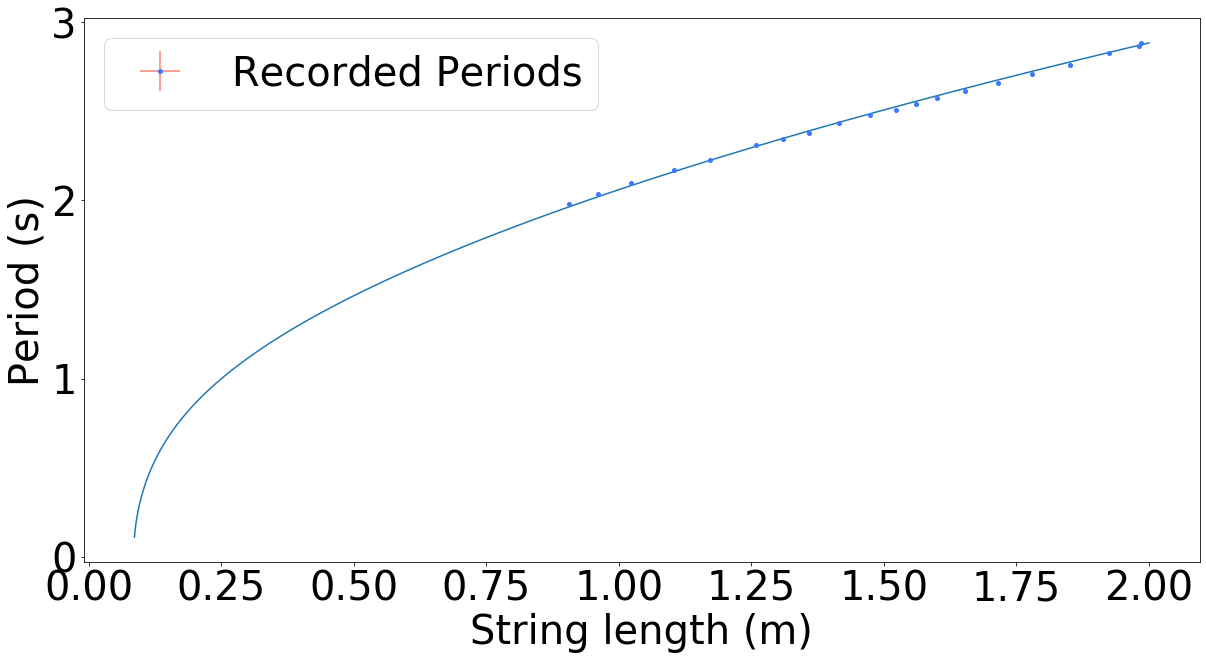

In [885]:
def f3(y, I, m):
    d = 0.08
    return np.sqrt(
        4.03*
        (y)*(1+I/(y))
        ) + m

param, cov = curve_fit(f2, period_height_specific_raw, period_specific_raw, p0=[0])
plt.figure(figsize=(20,10))

plt.errorbar(period_height_specific_raw,period_specific_raw,yerr=period_specific_raw_err,xerr=period_height_specific_raw_err,
                 fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=4, label="Recorded Periods")
plt.plot(np.linspace(0,2,1000),f2(np.linspace(0,2,1000), param[0]))

p = unumpy.uarray(param, np.sqrt(np.diag(cov)))
print(p)

plt.rcParams.update({'font.size': 40})
plt.xlabel("String length (m)")
plt.ylabel("Period (s)")
plt.legend(loc="upper left")
# plt.savefig("Figures/normal_complex.png", dpi=300)

# Complex Fit 2

In [886]:
# param, cov = curve_fit(f3, period_height_specific_raw, period_specific_raw, p0=[0])

# plt.errorbar(period_height_specific_raw,period_specific_raw,yerr=period_specific_raw_err,xerr=period_height_specific_raw_err,
#                  fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=4)
# plt.plot(np.linspace(0,2,1000),f3(np.linspace(0,2,1000), param[0]))

# p = unumpy.uarray(param, np.sqrt(np.diag(cov)))
# print(p)

## Lineraization Fit

[3.9814762658334764+/-0.02939042180557789
 0.31204260756946295+/-0.04363782825628624]
0.078+/-0.011


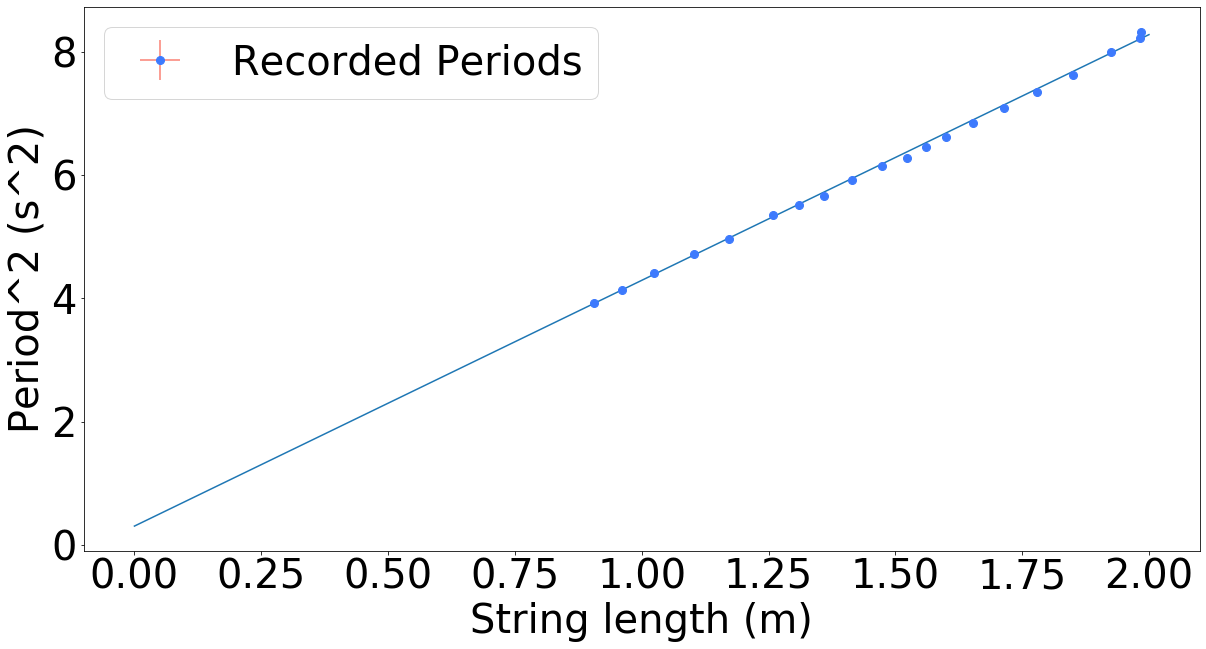

In [887]:
x_err = np.array([i.std_dev for i in period_height_specific])
y_err = np.array([i.std_dev for i in period_specific**2])


plt.figure(figsize=(20,10))
plt.errorbar(    period_height_specific_raw    ,
                 period_specific_raw**2           ,
            yerr=y_err,
            xerr=x_err,
                fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=8, label="Recorded Periods")

params, cov = np.polyfit(period_height_specific_raw*(1-0.3/100), period_specific_raw**2, 1, cov=True, w=1/y_err)
plt.plot(np.linspace(0,2,1000),params[0]*np.linspace(0,2,1000)+params[1])

p = unumpy.uarray(params, np.sqrt(np.diag(cov)))
print(p)
print(p[1]/p[0])

plt.rcParams.update({'font.size': 40})
plt.xlabel("String length (m)")
plt.ylabel("Period^2 (s^2)")
plt.legend(loc="upper left")
# plt.savefig("Figures/linear_2.png", dpi=300)

In [888]:
period_height_specific

array([1.9849324226379395+/-0.0013608276678311502,
       1.9820777773857117+/-0.0013608276678311502,
       1.924459993839264+/-0.0013608276678311502,
       1.8505832751592+/-0.0013608276678311502,
       1.7793643077214558+/-0.0013608276678311502,
       1.7146885792414348+/-0.0013608276678311502,
       1.6529029409090679+/-0.0013608276678311502,
       1.6001381158828736+/-0.0014907120210965368,
       1.5609490633010865+/-0.0014907120210965368,
       1.5231966733932496+/-0.0014907120210965368,
       1.4731645345687867+/-0.0014907120210965368,
       1.4143970966339112+/-0.0014907120210965368,
       1.3592094898223877+/-0.0014907120210965368,
       1.3099040031433105+/-0.0014907120210965368,
       1.2579119443893432+/-0.0014907120210965368,
       1.1720165252685546+/-0.0014907120210965368,
       1.1034404993057252+/-0.0014907120210965368,
       1.023486280441284+/-0.0014907120210965368,
       0.9610197186470032+/-0.0014907120210965368,
       0.9062873125076294+/-0.001490

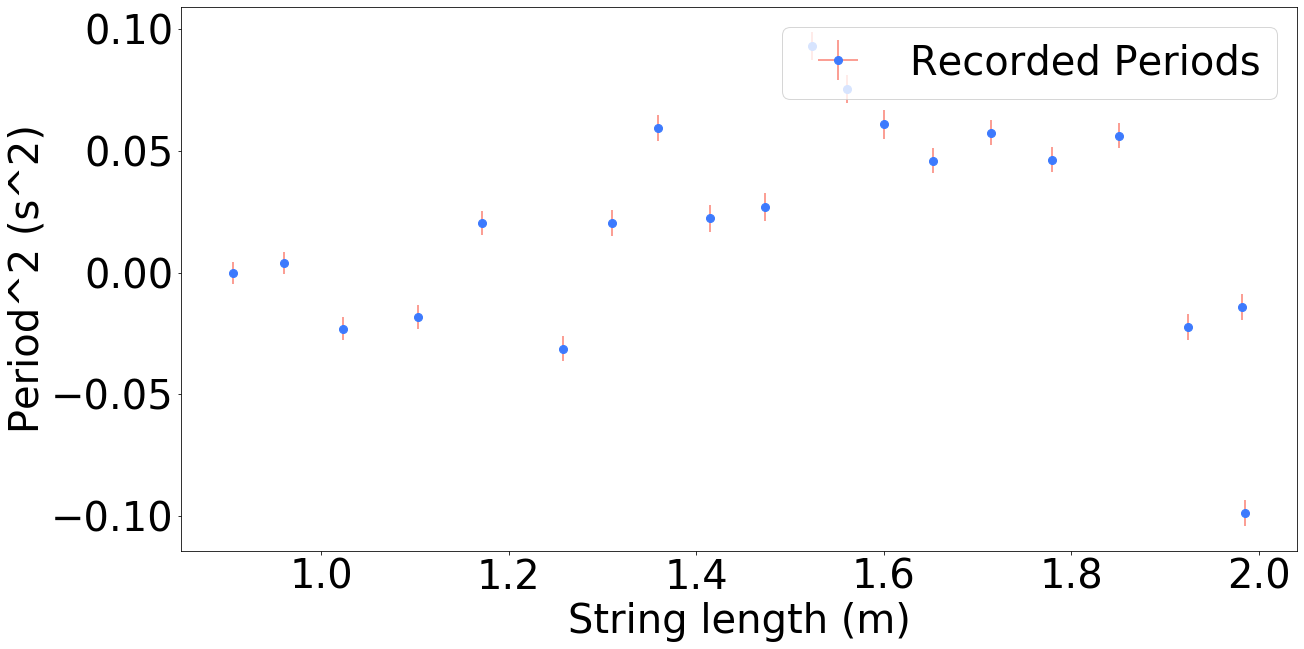

In [889]:
x_err = np.array([i.std_dev for i in period_height_specific])
y_err = np.array([i.std_dev for i in period_specific**2])

plt.figure(figsize=(20,10))
plt.errorbar(    period_height_specific_raw    ,
                 params[0]*period_height_specific_raw+params[1]-period_specific_raw**2           ,
            yerr=y_err,
            xerr=x_err,
                fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=8, label="Recorded Periods")

plt.rcParams.update({'font.size': 40})
plt.xlabel("String length (m)")
plt.ylabel("Period^2 (s^2)")
plt.legend(loc="upper right")
plt.savefig("linear_r_1.png", dpi=300)

## Log-log Plot

[0.5016007837801755+/-0.0039104362564696
 0.2988517923697151+/-0.0009130381108544522]


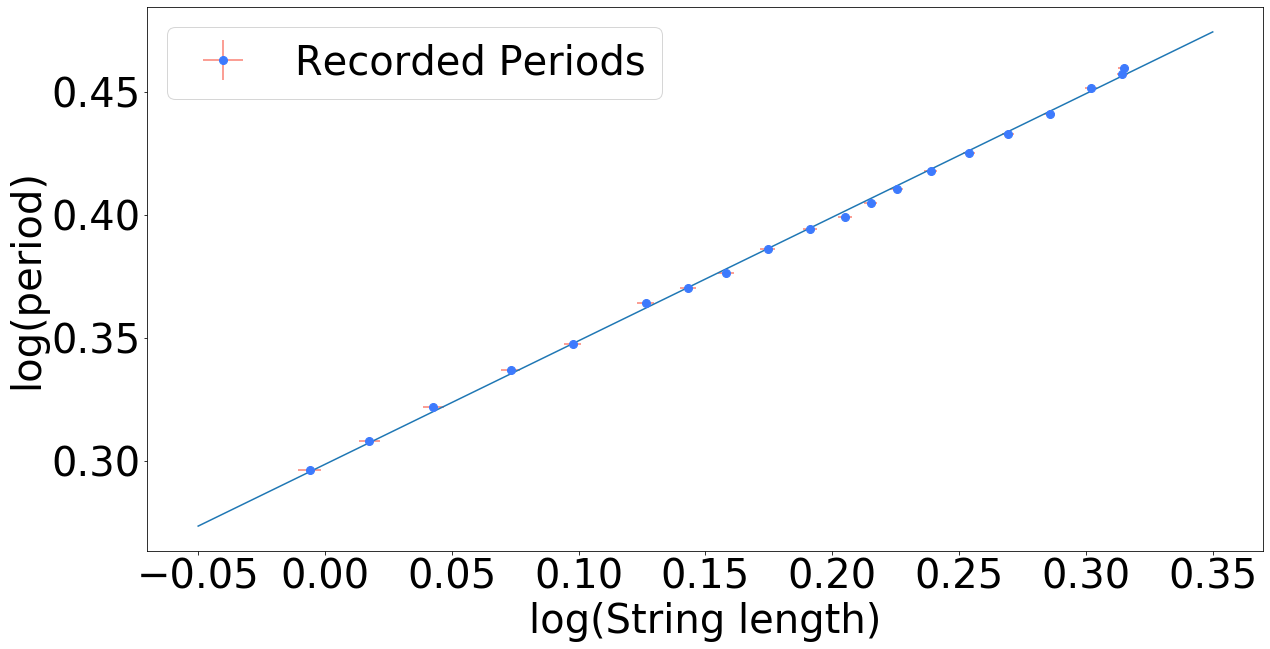

In [906]:
x_err = np.array([i.std_dev for i in unumpy.log(period_height_specific+ufloat(0.08,0.01))/unumpy.log(10)])
y_err = np.array([i.std_dev for i in unumpy.log(period_specific)/unumpy.log(10)])

display_x = np.array([i.n for i in unumpy.log(period_height_specific+ufloat(0.08,0.01))/unumpy.log(10)])
display_y = np.array([i.n for i in unumpy.log(period_specific)/unumpy.log(10)])

plt.figure(figsize=(20,10))
# plt.scatter(np.log(period_height_specific_raw),np.log(period_specific_raw))
plt.errorbar(    display_x,
                 display_y           ,
            yerr=y_err,
            xerr=x_err,
                fmt='o', color="xkcd:lightish blue", ecolor="salmon", ms=8, label="Recorded Periods")

params, cov = np.polyfit(display_x,display_y, 1, cov=True, w = 1/y_err)

temp_x = np.linspace(-0.05,0.35,1000)
plt.plot(temp_x,params[0]*temp_x+params[1])

p = unumpy.uarray(params, np.sqrt(np.diag(cov)))
print(p)

plt.rcParams.update({'font.size': 40})
plt.xlabel("log(String length)")
plt.ylabel("log(period)")
plt.legend(loc="upper left")
plt.savefig("Figures/log_2.png", dpi=300)

array(0.999896315728952+/-0.36791758646063283, dtype=object)

In [891]:
period_height[0]

1.9805806875228882+/-0.0033333334140479565

In [892]:
period[0]

2.8999996185302734+/-0.005656854518178539

In [893]:
max(period_height)

1.9941471815109253+/-0.0033333334140479565

In [894]:
4*np.pi**2/ufloat(9.8,0.05)

4.028409959628309+/-0.020553112038919942

In [895]:
sum(period_height)/len(period_height)

0.9970750219148138+/-0.00023168268789569238

In [896]:
(0.25)**2/(ufloat(0.146,0.001)**2)*(ufloat(4.16,0.02)/ufloat(4.03,0.02)-1)

0.0945828969909018+/-0.020953168585144146

In [897]:
0.5*unumpy.log(ufloat(4.03,0.02))/unumpy.log(10)

0.3026525230705547+/-0.0010776538012487635

In [898]:
ufloat(0.338,0.0005)/(ufloat(247,2)*unumpy.sqrt(ufloat(1.15,0.01)/ufloat(9.8,0.05)))

0.003994697195619749+/-3.855735301074486e-05

In [899]:
ufloat(247,2)/ufloat(1.13,0.01)

218.5840707964602+/-2.621904452720254

In [900]:
(max(period_height)-min(period_height))/(max(t)-min(t))

0.004399445268218133+/-1.1621606578313444e-05

In [901]:
(max(t)-min(t))

405.6333333333333+/-0.00565685424949238

In [902]:
lengths = unumpy.sqrt(x**2+y**2)

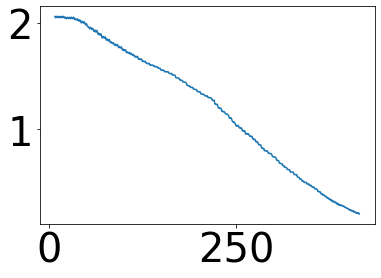

In [903]:
plt.plot(np.array([i.n for i in t]),np.array([i.n for i in lengths]))

In [905]:
29/338*ufloat(247,2)*201.5/115

37.132608695652166+/-0.30066889632107024